# 5. Capstone Project: Data Preparation I

***

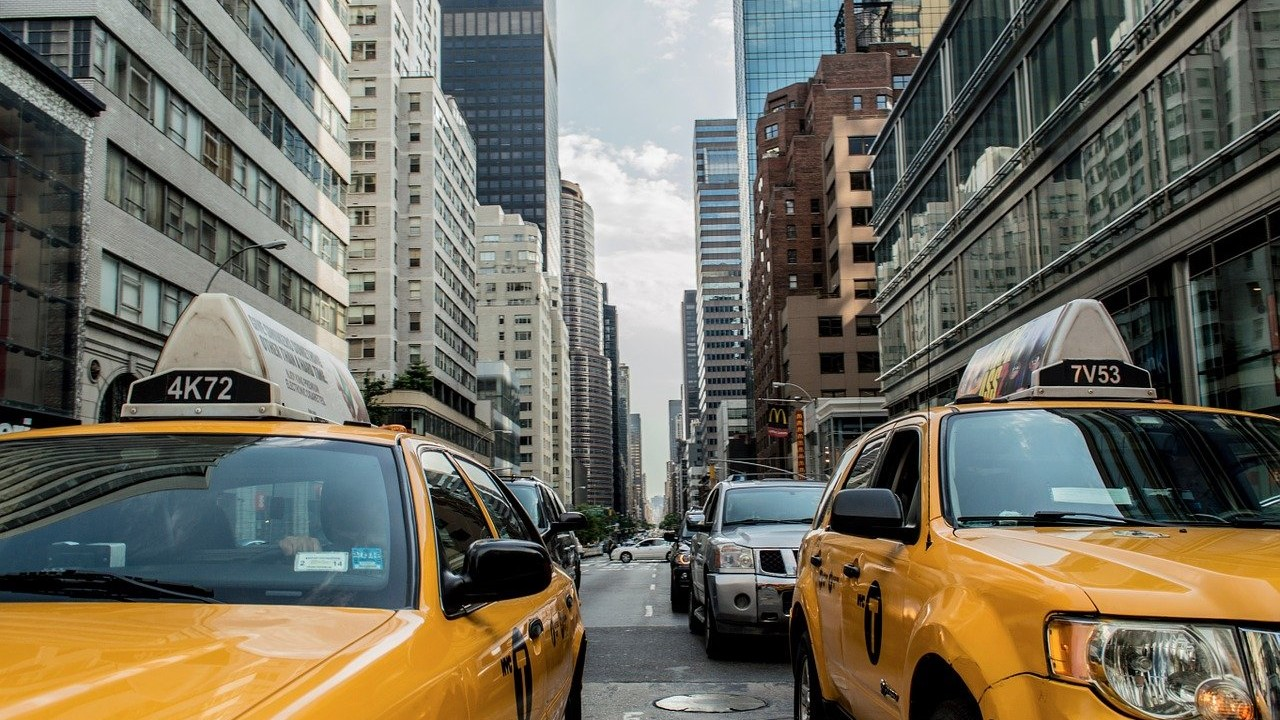

##  Goals

### Project:
Build various machine learning models capable of predict the duration of taxi trips in New York City, compare their performance, and explore the potential of additional variables such as weather forecasts and holidays to improve the predictive performance of the models.

### Section:
In this section, data will be prepared for the next steps, i.e., exploratory data analysis and machine learning model building. First, we will collect and import the necessary datasets. Next, we will review each of these datasets to fully understand the data and its structure, including the different variables available, their format, and their relevance to the project. Finally, we will perform data cleaning and manipulation, as well as feature engineering, and encoding.

The data preparation will be divided into two subsections, the first dedicated to the external datasets (Data Preparation Part I) and the second to the New York City Taxi Trip data set (Data Preparation Part II). Finally, external datasets will be merged with the primary one.

## Data
### External Datasets:
- Weather Forecast: The 2018 NYC weather forecast was collected from the [National Weather Service Forecast Office](https://w2.weather.gov/climate/index.php?wfo=okx) website. Daily measurements were taken from January to December 2018 in Central Park. These measures are given in imperial units and include daily minimum and maximum temperatures, precipitations, snowfall, and snow depth.

- Holidays: The 2018 NYC holidays list was collected from the [Office Holiday](https://www.officeholidays.com/countries/usa/new-york/2021) website. The dataset contains the name, date, and type of holidays for New York.

- Taxi Zones: The NYC Taxi Zones dataset was collected from the [NYC Open Data](https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc)website. It contains the pickup and drop-off zones (Location IDs) for the Yellow, Green, and FHV Trip Records. The taxi zones are based on the NYC Department of City Planning’s Neighborhood.

### Primary Datasets:

- Taxi Trips: The 2018 NYC Taxi Trip dataset was collected from the [Google Big Query](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?project=jovial-monument-300209&folder=&organizationId=) platform. The dataset contains more than 100'000'000 Yellow Taxi Trip records for 2018 and contains an extensive amount of variables including the pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

***

## Table of Content:
    1. Data Preparation
        1.1 External datasets
            1.1.1 Weather Forecast Dataset
            1.1.2 Holidays Dataset
            1.1.3 Taxi Zones Dataset
        1.2 Primary Dataset
            1.2.1 Taxi Trips Dataset
    2. Exploratory Data Analysis
    3. Machine Learning Models

    

***
## Python Libraries and Magic commands Import

In [1]:
# Import python core libraries
import os
import itertools

# Import data processing libraries
import numpy as np
import pandas as pd
import geopandas as gpd

# Import Visualization librairies
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set up magic commands
%matplotlib inline

***

## 1.1.1 Data Preparation: Weather Dataset
### Goal:
Explore the 2018 NYC Weather Forecast dataset and perform data cleaning and manipulation, as well as feature engineering and encoding if needed.
### Code:

In [3]:
# Get the 2018 weather weather forecast in NYC from the offical
weather_df = pd.read_csv(r'data\raw\weather_nyc_2018.csv', parse_dates=['Date'])

# Rename the date column
weather_df.rename({'Date': 'date'}, axis=1, inplace=True)

# Dispaly the first five rows of the data frame
weather_df.head()

,date,max_temp,min_temp,avg_temp,dep_temp,hdd,cdd,prec,new_snow,snow_depth
0,2018-01-01,19,7,13.0,-22.2,52,0,0,0,T
1,2018-01-02,26,13,19.5,-15.5,45,0,0,0,0
2,2018-01-03,30,16,23.0,-11.8,42,0,0,0,T
3,2018-01-04,29,19,24.0,-10.7,41,0,0.76,9.8,1
4,2018-01-05,19,9,14.0,-20.5,51,0,0,0,7


In [4]:
# Get a quick description of the data frame
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        365 non-null    datetime64[ns]
 1   max_temp    365 non-null    int64         
 2   min_temp    365 non-null    int64         
 3   avg_temp    365 non-null    float64       
 4   dep_temp    365 non-null    float64       
 5   hdd         365 non-null    int64         
 6   cdd         365 non-null    int64         
 7   prec        365 non-null    object        
 8   new_snow    365 non-null    object        
 9   snow_depth  365 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 28.6+ KB


**Observations:** the dataset contains 0 null values. However, the prec, new_snow, and snow_depth columns contain objects or strings yet should only contain numbers (i.e., floats or integers). Getting a list of the columns' unique values will help us identify the problematic entries.

In [5]:
# Get the unique vlaues from the snow_depth column
print('snow_depth:', weather_df['snow_depth'].unique())

# Get the unique values from the new_snow column
print('new_snow:', weather_df['new_snow'].unique())

# Get the unique values from the prec column
print('prec:', weather_df['prec'].unique())

snow_depth: ['T' '0' '1' '7' '6' '5' '4' '3' '2' '8']
new_snow: ['0' '9.8' 'T' '0.4' '0.1' '0.9' '0.5' '4.4' '3.2' '8.2' '0.2' '5.5' '6.4']
prec: ['0' '0.76' '0.01' '0.54' '0.05' '0.19' '0.3' '0.21' 'T' '0.11' '0.18'
 '0.96' '0.85' '0.58' '1.21' '0.08' '0.16' '0.09' '0.52' '0.04' '0.06'
 '0.17' '0.73' '0.38' '1.86' '1.41' '0.28' '0.99' '0.03' '0.59' '0.26'
 '0.47' '2.82' '0.15' '0.95' '0.1' '0.02' '0.25' '0.22' '0.34' '0.65'
 '0.29' '0.44' '0.27' '0.07' '1.36' '0.23' '0.71' '0.36' '0.64' '2.24'
 '0.63' '1.06' '0.37' '0.51' '0.24' '0.74' '0.61' '2.9' '0.66' '0.79'
 '1.04' '0.72' '0.45' '0.93' '0.13' '1.19' '1.95' '0.77' '0.69' '0.84'
 '0.43' '1.27' '0.68' '1.16' '0.31' '0.97' '0.81' '0.14' '1.43' '1.61'
 '0.12' '1.15' '1.02']


**Obsverations:** the snpw_depth, new_snow, and perc columns may contain the T character. According to the National Weather Service Forecast Office, this character stands for trace amounts. Hence we will replace this value with 0 and convert the content of these columns to float. Additionally, we will also get rid of a few columns containing data not needed to train our future models.

In [6]:
# Replace Ts by 0
weather_df.replace('T', 0, inplace = True)

# Gather columns to be convert to float16
float_columns = ['avg_temp', 'prec', 'new_snow', 'snow_depth']

# Convert string columns to float
weather_df[float_columns] = weather_df[float_columns].astype(float)

# Round numerical columns to one decimals
weather_df = weather_df.round(1)

# Drop non-essential columns
weather_df = weather_df[['date', 'avg_temp', 'prec', 'new_snow', 'snow_depth']]

# Get a quick description of the data frame
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        365 non-null    datetime64[ns]
 1   avg_temp    365 non-null    float64       
 2   prec        365 non-null    float64       
 3   new_snow    365 non-null    float64       
 4   snow_depth  365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


**Observations:** The T characters were correctly converted to zeros and the columns to float.

In [7]:
# Display some descriptive statistics
weather_df.describe()

,avg_temp,prec,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000
mean,55.953425,0.177534,0.108493,0.178082
std,17.724324,0.401699,0.846881,0.933834
min,9.500000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000
75%,73.000000,0.100000,0.000000,0.000000
max,87.500000,2.900000,9.800000,8.000000


**Notes:** Numerical values such as temperature, precipitation and snow depth are given in imperial units. Converting them to metric units is not strictly necessary but can help uncommon and outlying values. We will therefore convert temperatures to degrees Celsius and depths to centimeters.

In [8]:
# Convert temperature from fahrenheit to celcius
weather_df['avg_temp'] = (weather_df['avg_temp'] - 32) / 1.8

# Convert inches of snow to centimeters
weather_df['new_snow'] = weather_df['new_snow'] * 2.54

# Display some descriptive statistics
weather_df.describe()

,avg_temp,prec,new_snow,snow_depth
count,365.000000,365.000000,365.000000,365.000000
mean,13.307458,0.177534,0.275573,0.178082
std,9.846847,0.401699,2.151078,0.933834
min,-12.500000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,12.222222,0.000000,0.000000,0.000000
75%,22.777778,0.100000,0.000000,0.000000
max,30.833333,2.900000,24.892000,8.000000


**Observations:** The numerical columns were correctly converted to metric units. The weather data set does not contain any outliers or incorrect values.


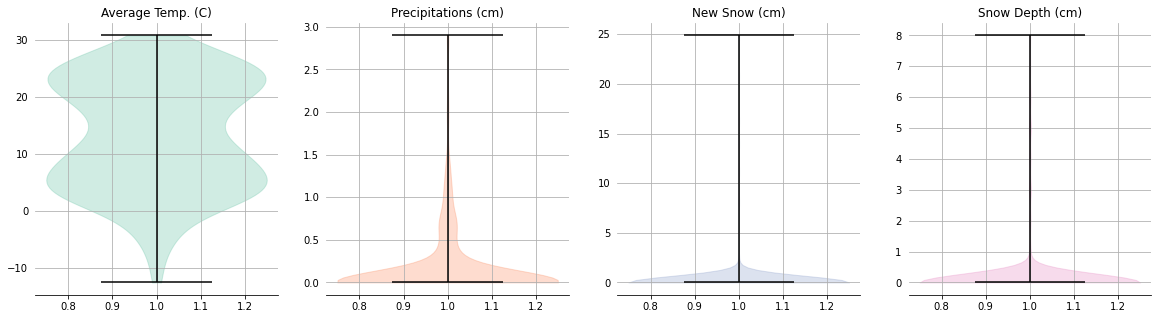

In [9]:
# Define the color palette
cpal = itertools.cycle(sns.color_palette('Set2'))

# Define the name sof the columns
weather_colnames = ['Average Temp. (C)', 'Precipitations (cm)', 'New Snow (cm)', 'Snow Depth (cm)']

# Creat a figure with four columns and one row5
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))

# Generate the plots
for ax, col, colname in zip(axes, float_columns, weather_colnames):
    violin_plot = ax.violinplot(weather_df[col])

    # Change color of the violin plot
    for pc, color in zip(violin_plot['bodies'], cpal):
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
    
    violin_plot['cbars'].set_edgecolor('black')
    violin_plot['cmins'].set_edgecolor('black')
    violin_plot['cmaxes'].set_edgecolor('black')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_title(colname)
    ax.grid()

# Display the figure
plt.show()

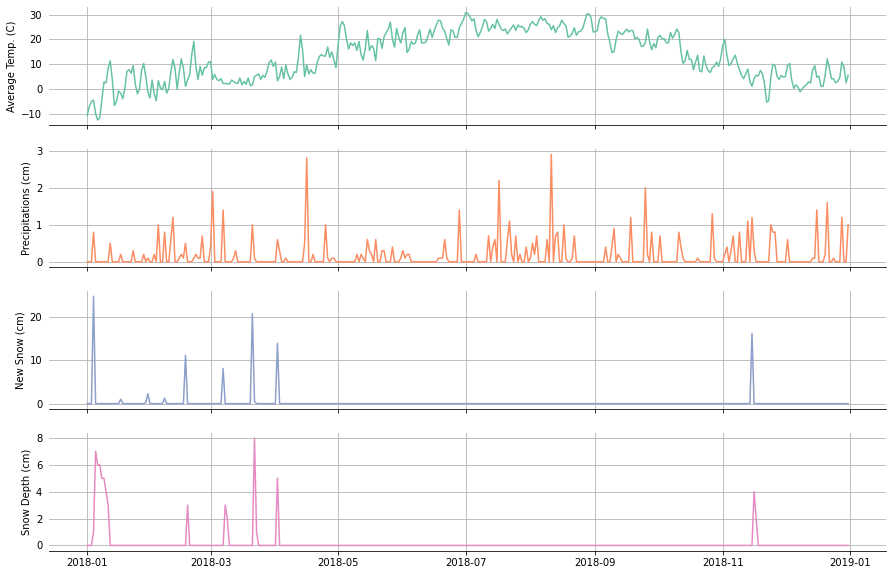

In [10]:
# Define the color palette
cpal = itertools.cycle(sns.color_palette('Set2'))

# Define the name sof the columns
weather_colnames = ['Average Temp. (C)', 'Precipitations (cm)', 'New Snow (cm)', 'Snow Depth (cm)']

# Define the color palette
cpal = itertools.cycle(sns.color_palette('Set2'))

# Creat a figure with with four rows and one columns
fig, axes = plt.subplots(nrows=4, figsize=(15, 10), sharex=True)

# Generate the plots
for ax, col, colname in zip(axes, float_columns, weather_colnames):
    ax.plot(weather_df['date'], weather_df[col], color=next(cpal))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_ylabel(colname)
    ax.grid()

# Display the figure
plt.show()

**Observations:** As expected, lower temperatures and snow fall are mainly observed in winter, while higher temperatures are mainly observed in summer.

## 1.2 Data Preparation: Holidays dataset
### Goal:
Explore the 2018 NYC Holidays dataset and perform data cleaning and manipulation, as well as feature engineering and encoding if needed.
### Code:

In [11]:
# Get the official 2018 holiday in NYC from the officeholidays webiste
holidays_df = pd.read_html('https://www.officeholidays.com/countries/usa/new-york/2018')[0]

# Display the first five rows of the holidays data frame
holidays_df.head()

,Day,Date,Holiday Name,Type,Comments
0,Monday,Jan 01,New Year's Day,Federal Holiday,NaN
1,Monday,Jan 15,Martin Luther King Jr. Day,Federal Holiday,3rd Monday in January
2,Monday,Feb 12,Lincoln's Birthday,Government Holiday,"Connecticut, Illinois, Missouri, New York."
3,Monday,Feb 19,Washington's Birthday (Observed),Federal Holiday,3rd Monday in February
4,Sunday,May 13,Mother's Day,Not A Public Holiday,2nd Sunday in May. Not a public holiday


In [12]:
# Get a quick description of the data frame
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day           16 non-null     object
 1   Date          16 non-null     object
 2   Holiday Name  16 non-null     object
 3   Type          16 non-null     object
 4   Comments      12 non-null     object
dtypes: object(5)
memory usage: 768.0+ bytes


**Observations:** The data frames contains 16 rows and five columns, including the date, the name, and the type of the holiday. There are missing values in the comments columns. The date column includes only the month and day. We will first convert the date from string to DateTime. Then we will rank the holidays based on their national importance. Finally, we will drop most columns, except the date and type, as they are the only ones susceptible to provide information helping with the training of our models.

In [13]:
# Add a year column to the data frame 
holidays_df['Year'] = '2018'

# Add the missing year in the date column
holidays_df['Date'] = holidays_df['Date'] + ' ' + holidays_df['Year']

# Convert the date from string to datetime
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Display the first five rows of the data frame
holidays_df.head()

,Day,Date,Holiday Name,Type,Comments,Year
0,Monday,2018-01-01,New Year's Day,Federal Holiday,NaN,2018
1,Monday,2018-01-15,Martin Luther King Jr. Day,Federal Holiday,3rd Monday in January,2018
2,Monday,2018-02-12,Lincoln's Birthday,Government Holiday,"Connecticut, Illinois, Missouri, New York.",2018
3,Monday,2018-02-19,Washington's Birthday (Observed),Federal Holiday,3rd Monday in February,2018
4,Sunday,2018-05-13,Mother's Day,Not A Public Holiday,2nd Sunday in May. Not a public holiday,2018


**Observations:** The dates were correctly transformed into a Year-Month-Day format.

In [14]:
# Get the unique type of holidays
holidays_df['Type'].unique().tolist()

['Federal Holiday', 'Government Holiday', 'Not A Public Holiday']

**Observations:** There are three type of holidays: Federal Holiday, Government Holiday, and Not A Public Holiday. Government holidays will be ranked the highest and Not-public holidays the lowest.

In [15]:
# Discard holidays that are not a public holiday
holidays_df['Type'] = holidays_df['Type'].replace({'Federal Holiday':3, 'Government Holiday':2, 'Not A Public Holiday':1})

# Drop non-essential columns
holidays_df = holidays_df[['Date', 'Type']]

# Rename columns to fit their content
holidays_df.rename({'Date':'holidays_date', 'Type':'holidays_type'}, axis=1, inplace=True)

# Display the first five rows of the data frame
holidays_df.head()

,holidays_date,holidays_type
0,2018-01-01,3
1,2018-01-15,3
2,2018-02-12,2
3,2018-02-19,3
4,2018-05-13,1


## 1.1.3 Data Preparation: 
### Goals:
Explore the NYC Taxi Zones dataset and perform data cleaning and manipulation, as well as feature engineering and encoding if needed.
### Code:

In [16]:
# Import the official NYC taxi zones
zones_df = gpd.read_file(r'data\raw\taxi_zones_shapefile')

# Display the first five rows of the data frame
zones_df.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [17]:
# Get a quick description of the data frame
zones_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB


In [18]:
# Get the unique values from the zone column
nyc_zones = sorted(zones_df['zone'].unique())

# Get the unique values from the borough column
nyc_boroughs = sorted(zones_df['borough'].unique())

# Display the number of zones dans boroughs
print(f'There are a total of {len(nyc_zones)} zones distributed in {len(nyc_boroughs)} boroughs in NYC including:')

# Display the name of the Boroughs
for name in nyc_boroughs:
    print(f'- {name}')

There are a total of 260 zones distributed in 6 boroughs in NYC including:
- Bronx
- Brooklyn
- EWR
- Manhattan
- Queens
- Staten Island


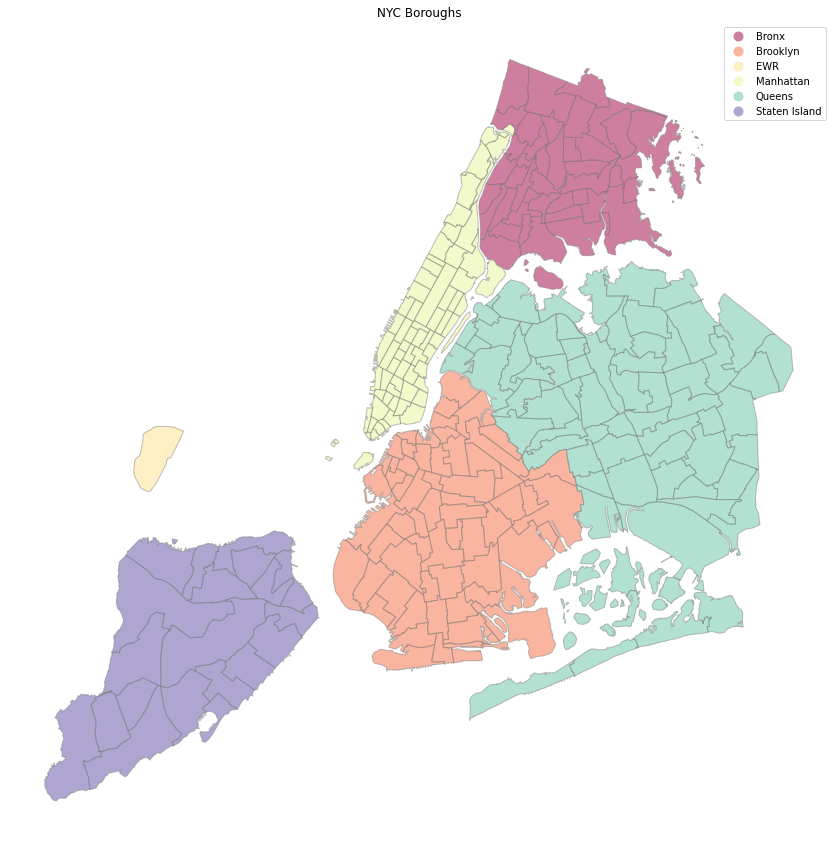

In [19]:
# Creat a figure with one row and one column
fig, axe = plt.subplots(figsize=(15, 15))

# Generate the first plot
zones_df.plot(column='borough',
    ax=axe,
    alpha=0.5,
    cmap='Spectral',
    edgecolor='grey',
    legend=True)
    
# Define the title of the plot    
axe.set_title('NYC Boroughs')

# Remove axes
plt.axis('off')

# Display the plot
plt.show()

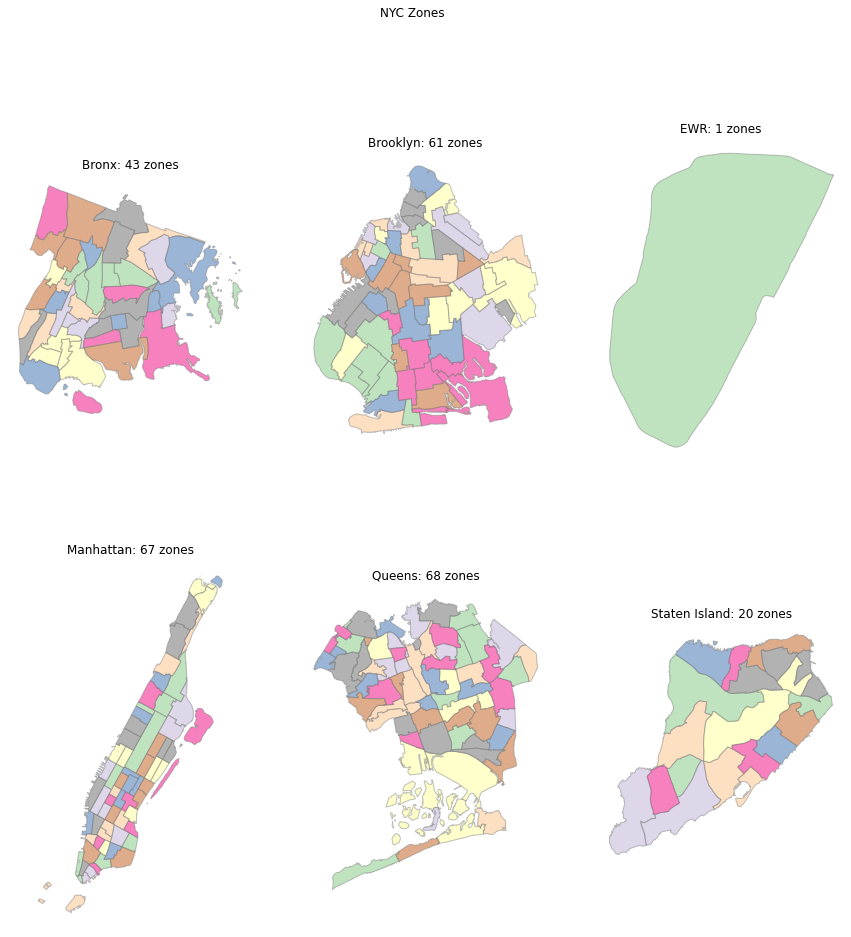

In [20]:
# Creat a figure with one row and one column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Generate the first plot
for ax, borough in zip(axes.flatten(), nyc_boroughs):
    borough_df = zones_df.loc[zones_df.borough == borough]
    borough_df.plot(column='zone', cmap='Accent', ax=ax, alpha=0.5, edgecolor='grey')
    ax.set_title(f'{borough}: {len(borough_df.zone.unique())} zones')
    ax.set_axis_off()


# Define the title of the plot
fig.suptitle('NYC Zones')

# Remove axes
plt.axis('off')

# Display the plot
plt.show()

***
## Data Export

In [21]:
# Export the Holidays dataset
weather_df.to_csv(r'data\processed\weather.csv', index=False)

# Export the Holidays dataset
holidays_df.to_csv(r'data\processed\holidays.csv', index=False)

# Export the Holidays dataset
zones_df.to_csv(r'data\processed\zones.csv', index=False)